In [1]:
import numpy as np
import pandas as pd
import re 
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://www.ambitionbox.com/list-of-companies?"

In [3]:
response=requests.get(url)

In [4]:
response

<Response [403]>

In [5]:
requests_header={"content-type":"text/plain",
                "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36",
                "accept-encoding":"gzip, deflate, br, zstd"}

In [6]:
response=requests.get(url,headers=requests_header)

In [7]:
response

<Response [200]>

In [8]:
pagecontent=response.text

In [9]:
soup=BeautifulSoup(pagecontent)

In [10]:
companies = soup.find_all("div", class_="companyCardWrapper__companyPrimaryDetailsTopSection")
company_names=[]
for company in companies:
    company_names.append(re.findall(r"\w+",company.text))

print(company_names[0:10])

[['TCS'], ['Accenture'], ['Wipro'], ['Cognizant'], ['Capgemini'], ['HDFC', 'Bank'], ['Infosys'], ['ICICI', 'Bank'], ['HCLTech'], ['Tech', 'Mahindra']]


In [11]:
ratings=soup.find_all("div", class_="rating_text")
rates=[]
for i in ratings:
    rates.append(re.findall(r"\w+\W\w+",i.text))
print(rates[0:10])

[['3.4'], ['3.7'], ['3.7'], ['3.7'], ['3.7'], ['3.8'], ['3.5'], ['4.0'], ['3.4'], ['3.4']]


In [12]:
operations_spread=[]
for i in soup.find_all("span", class_="companyCardWrapper__interLinking"):
    text = i.text.strip()
    loc=re.findall(r"\+(\d+)\s+other\s+locations",text) 
    if loc:
        operations_spread.append(int(loc[0])+1)
    else:
        operations_spread.append(np.nan)

print(operations_spread[0:10])

[434, 249, 368, 229, 182, 1787, 240, 1421, 225, 330]


In [13]:
rating_blocks = soup.find_all("div", class_="companyCardWrapper__ratingComparisonWrapper")
titles_on_page = soup.find_all("a", class_="companyCardWrapper__companyName")

h_rate=[]
c_rate=[]
for i in range(len(titles_on_page)):
    if i < len(rating_blocks):
        text = rating_blocks[i].text.strip()
    
        match_high = re.search(r"Highly Rated For (.*?)(?:Critically Rated For|$)", text)
        h_rate.append(match_high.group(1).strip() if match_high else np.nan)
    
        match_crit = re.search(r"Critically Rated For (.*)", text)
        c_rate.append(match_crit.group(1).strip() if match_crit else np.nan)
    else:
        h_rate.append(np.nan)
        c_rate.append(np.nan)

print(h_rate[0:10])
print("\n")
print(c_rate[0:10])

['Job Security', nan, 'Job Security', nan, 'Work Life Balance, Job Security', 'Job Security, Skill Development / Learning', 'Job Security', 'Job Security, Skill Development / Learning, Company Culture', nan, nan]


['Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', nan, 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction']


In [14]:
typeofcomp=soup.find_all("span", class_="companyCardWrapper__interLinking")
types=[]
for i in typeofcomp:
    if "|" in str(i):
        text = i.text.split("|")[0].strip()
        types.append(text)
    else:
        types.append("NA")

print(types[0:10])

['IT Services & Consulting', 'IT Services & Consulting', 'IT Services & Consulting', 'IT Services & Consulting', 'IT Services & Consulting', 'Banking', 'IT Services & Consulting', 'Banking', 'IT Services & Consulting', 'IT Services & Consulting']


In [15]:
locations=soup.find("span", class_="companyCardWrapper__interLinking")
locations

<span class="companyCardWrapper__interLinking">
							IT Services &amp; Consulting | Bangalore / Bengaluru +433 other locations
						</span>

In [16]:
locations=soup.find_all("span", class_="companyCardWrapper__interLinking")
location=[]
for i in locations:
    if "|" in str(i):
        text = i.text.split("|")[1].strip().split(" ")[0]
        location.append(text)
    else:
        location.append("NA")

print(location[0:20])

['Bangalore', 'Bangalore', 'Hyderabad', 'Hyderabad', 'Bangalore', 'Mumbai', 'Bangalore', 'Mumbai', 'Chennai', 'Hyderabad', 'Hyderabad', 'Mumbai', 'Mumbai', 'Bangalore', 'Mumbai', 'Bangalore', 'Noida', 'Mumbai', 'Bangalore', 'Bangalore']


In [17]:
counts=soup.find("span", class_="companyCardWrapper__ActionCount")
counts

<span class="companyCardWrapper__ActionCount">1.1L</span>

In [18]:
counts=soup.find_all("span", class_="companyCardWrapper__ActionCount")
reviews=[]
reviews_1=[]
salaries=[]
interviews=[]
jobs=[]
benefits=[]
photos=[]
for i in counts:
    reviews.append(i.text)
    reviews_1.extend(reviews[0::6])
    salaries.extend(reviews[1::6])
    interviews.extend(reviews[2::6])
    jobs.extend(reviews[3::6])
    benefits.extend(reviews[4::6])
    photos.extend(reviews[5::6])

print(reviews[0:10])
print("\n")
print(reviews_1[0:10])
print("\n")
print(salaries[0:10])
print("\n") 
print(interviews[0:10])
print("\n")
print(jobs[0:10])
print("\n")
print(benefits[0:10])
print("\n")
print(photos[0:10])

['1.1L', '9.5L', '11.6k', '1.1k', '10.6k', '87', '68.5k', '6.3L', '9k', '29.6k']


['1.1L', '1.1L', '1.1L', '1.1L', '1.1L', '1.1L', '1.1L', '68.5k', '1.1L', '68.5k']


['9.5L', '9.5L', '9.5L', '9.5L', '9.5L', '9.5L', '9.5L', '6.3L', '9.5L', '6.3L']


['11.6k', '11.6k', '11.6k', '11.6k', '11.6k', '11.6k', '11.6k', '9k', '11.6k', '9k']


['1.1k', '1.1k', '1.1k', '1.1k', '1.1k', '1.1k', '1.1k', '29.6k', '1.1k', '29.6k']


['10.6k', '10.6k', '10.6k', '10.6k', '10.6k', '10.6k', '10.6k', '6.7k', '10.6k', '6.7k']


['87', '87', '87', '87', '87', '87', '87', '48', '87', '48']


In [19]:
import requests
from bs4 import BeautifulSoup
import re
company_names=[]
rates=[]
rate_count = []
types=[]
location=[]
reviews_1=[]
salaries = []
interviews =[]
jobs = []
benefits = []
photos = []
h_rate=[]
c_rate=[]
operations_spread=[]
us="https://www.ambitionbox.com/list-of-companies?"
for i in range(1,26):
    url=us+"page="+str(i)
    page = requests.get(url, headers=requests_header)
    soup=BeautifulSoup(page.text)
    companies = soup.find_all("div", class_="companyCardWrapper__companyPrimaryDetailsTopSection")
    for company in companies:
        company_names.append(re.findall(r"\w+",company.text))
        
    ratings=soup.find_all("div", class_="rating_text")
    for i in ratings:
        rates.append(re.findall(r"\w+\W\w+",i.text))
    
     # operations_spread
    for i in soup.find_all("span", class_="companyCardWrapper__interLinking"):
        text = i.text.strip()
        loc=re.findall(r"\+(\d+)\s+other\s+locations",text) 
        if loc:
            operations_spread.append(int(loc[0])+1)
        else:
            operations_spread.append(np.nan)

    # Highly Rated & Critically rated
    rating_blocks = soup.find_all("div", class_="companyCardWrapper__ratingComparisonWrapper")
    titles_on_page = soup.find_all("a", class_="companyCardWrapper__companyName")
    
    for i in range(len(titles_on_page)):
        if i < len(rating_blocks):
            text = rating_blocks[i].text.strip()
    
            match_high = re.search(r"Highly Rated For (.*?)(?:Critically Rated For|$)", text)
            h_rate.append(match_high.group(1).strip() if match_high else np.nan)
    
            match_crit = re.search(r"Critically Rated For (.*)", text)
            c_rate.append(match_crit.group(1).strip() if match_crit else np.nan)
        else:
            h_rate.append(np.nan)
            c_rate.append(np.nan)

    typeofcomp=soup.find_all("span", class_="companyCardWrapper__interLinking")
    for i in typeofcomp:
        if "|" in str(i):
            text = i.text.split("|")[0].strip()
            types.append(text)
        else:
            types.append("NA")
        
    locations=soup.find_all("span", class_="companyCardWrapper__interLinking")
    for i in locations:
        if "|" in str(i):
            text = i.text.split("|")[1].strip().split(" ")[0]
            location.append(text)
        else:
            location.append("NA")
    counts=soup.find_all("span", class_="companyCardWrapper__ActionCount")
    reviews=[]
    for i in counts:
        reviews.append(i.text)
    reviews_1.extend(reviews[0::6])
    salaries.extend(reviews[1::6])
    interviews.extend(reviews[2::6])
    jobs.extend(reviews[3::6])
    benefits.extend(reviews[4::6])
    photos.extend(reviews[5::6])
    print(url)

https://www.ambitionbox.com/list-of-companies?page=1
https://www.ambitionbox.com/list-of-companies?page=2
https://www.ambitionbox.com/list-of-companies?page=3
https://www.ambitionbox.com/list-of-companies?page=4
https://www.ambitionbox.com/list-of-companies?page=5
https://www.ambitionbox.com/list-of-companies?page=6
https://www.ambitionbox.com/list-of-companies?page=7
https://www.ambitionbox.com/list-of-companies?page=8
https://www.ambitionbox.com/list-of-companies?page=9
https://www.ambitionbox.com/list-of-companies?page=10
https://www.ambitionbox.com/list-of-companies?page=11
https://www.ambitionbox.com/list-of-companies?page=12
https://www.ambitionbox.com/list-of-companies?page=13
https://www.ambitionbox.com/list-of-companies?page=14
https://www.ambitionbox.com/list-of-companies?page=15
https://www.ambitionbox.com/list-of-companies?page=16
https://www.ambitionbox.com/list-of-companies?page=17
https://www.ambitionbox.com/list-of-companies?page=18
https://www.ambitionbox.com/list-of-c

In [20]:
d={
    "company":company_names,
    "ratings":rates,
    "types":types,
    "location":location,
    "reviews":reviews_1,
    "salaries":salaries,
    "interviews":interviews,
    "jobs":jobs,
    "benefits":benefits,
    "photos":photos,
    "high":h_rate,
    "low":c_rate,
    "tots_oper":operations_spread}

In [21]:
df=pd.DataFrame(d)
df

,company,ratings,types,location,reviews,salaries,interviews,jobs,benefits,photos,high,low,tots_oper
0,[TCS],[3.4],IT Services & Consulting,Bangalore,1.1L,9.5L,11.6k,1.1k,10.6k,87,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor...",434
1,[Accenture],[3.7],IT Services & Consulting,Bangalore,68.5k,6.3L,9k,29.6k,6.7k,48,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",249
2,[Wipro],[3.7],IT Services & Consulting,Hyderabad,61.3k,4.7L,6.4k,4.5k,4.6k,99,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor...",368
3,[Cognizant],[3.7],IT Services & Consulting,Hyderabad,58.2k,5.9L,6.2k,808,5.5k,82,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",229
4,[Capgemini],[3.7],IT Services & Consulting,Bangalore,49.9k,4.7L,5.3k,2.1k,3.6k,41,"Work Life Balance, Job Security","Promotions / Appraisal, Salary & Benefits, Wor...",182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[NCR, Corporation]",[3.6],IT Services & Consulting,Hyderabad,1.8k,9k,142,49,173,6,NaN,"Promotions / Appraisal, Job Security, Skill De...",89
496,[Microland],[3.4],IT Services & Consulting,Bangalore,1.8k,10.6k,142,533,158,5,NaN,"Promotions / Appraisal, Work Satisfaction, Sal...",45
497,[Crisil],[3.6],Analytics & KPO,Mumbai,1.8k,12.7k,206,633,222,18,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",77
498,"[Gabriel, India, Limited]",[4.1],Auto Components,Pune,1.8k,5.6k,126,--,249,--,"Job Security, Skill Development / Learning, Co...",NaN,51


In [22]:
df.to_csv("companies.csv",index=False)

In [23]:
cmpy_df=pd.read_csv("companies.csv")

In [24]:
cmpy_df

,company,ratings,types,location,reviews,salaries,interviews,jobs,benefits,photos,high,low,tots_oper
0,['TCS'],['3.4'],IT Services & Consulting,Bangalore,1.1L,9.5L,11.6k,1.1k,10.6k,87,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor...",434
1,['Accenture'],['3.7'],IT Services & Consulting,Bangalore,68.5k,6.3L,9k,29.6k,6.7k,48,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",249
2,['Wipro'],['3.7'],IT Services & Consulting,Hyderabad,61.3k,4.7L,6.4k,4.5k,4.6k,99,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor...",368
3,['Cognizant'],['3.7'],IT Services & Consulting,Hyderabad,58.2k,5.9L,6.2k,808,5.5k,82,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",229
4,['Capgemini'],['3.7'],IT Services & Consulting,Bangalore,49.9k,4.7L,5.3k,2.1k,3.6k,41,"Work Life Balance, Job Security","Promotions / Appraisal, Salary & Benefits, Wor...",182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"['NCR', 'Corporation']",['3.6'],IT Services & Consulting,Hyderabad,1.8k,9k,142,49,173,6,NaN,"Promotions / Appraisal, Job Security, Skill De...",89
496,['Microland'],['3.4'],IT Services & Consulting,Bangalore,1.8k,10.6k,142,533,158,5,NaN,"Promotions / Appraisal, Work Satisfaction, Sal...",45
497,['Crisil'],['3.6'],Analytics & KPO,Mumbai,1.8k,12.7k,206,633,222,18,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",77
498,"['Gabriel', 'India', 'Limited']",['4.1'],Auto Components,Pune,1.8k,5.6k,126,--,249,--,"Job Security, Skill Development / Learning, Co...",NaN,51


In [25]:
cmpy_df.shape

(500, 13)

In [26]:
cmpy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     500 non-null    object
 1   ratings     500 non-null    object
 2   types       495 non-null    object
 3   location    495 non-null    object
 4   reviews     500 non-null    object
 5   salaries    500 non-null    object
 6   interviews  500 non-null    object
 7   jobs        500 non-null    object
 8   benefits    500 non-null    object
 9   photos      500 non-null    object
 10  high        340 non-null    object
 11  low         405 non-null    object
 12  tots_oper   500 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 50.9+ KB


In [27]:
cmpy_df["company"] = (cmpy_df["company"].astype(str).str.replace("[", "", regex=False)
    .str.replace("]", "", regex=False).str.replace("'", "", regex=False)
    .str.strip())

In [28]:
cmpy_df["ratings"] = cmpy_df["ratings"].str.strip("[]'").astype(float)

In [29]:
def convert_to_number(x):
    if pd.isna(x):
        return None
    x = str(x).lower().replace(",", "")
    if "l" in x: 
        return float(x.replace("l", "")) * 100000
    elif "k" in x:  
        return float(x.replace("k", "")) * 1000
    else:
        try:
            return float(x)
        except:
            return None

for col in ["salaries", "reviews", "interviews", "jobs", "benefits", "photos"]:
    cmpy_df[col] = cmpy_df[col].apply(convert_to_number)

In [30]:
cmpy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     500 non-null    object 
 1   ratings     500 non-null    float64
 2   types       495 non-null    object 
 3   location    495 non-null    object 
 4   reviews     500 non-null    float64
 5   salaries    500 non-null    float64
 6   interviews  500 non-null    float64
 7   jobs        426 non-null    float64
 8   benefits    500 non-null    float64
 9   photos      474 non-null    float64
 10  high        340 non-null    object 
 11  low         405 non-null    object 
 12  tots_oper   500 non-null    int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 50.9+ KB


In [31]:
cmpy_df.head()

,company,ratings,types,location,reviews,salaries,interviews,jobs,benefits,photos,high,low,tots_oper
0,TCS,3.4,IT Services & Consulting,Bangalore,110000.0,950000.0,11600.0,1100.0,10600.0,87.0,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor...",434
1,Accenture,3.7,IT Services & Consulting,Bangalore,68500.0,630000.0,9000.0,29600.0,6700.0,48.0,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",249
2,Wipro,3.7,IT Services & Consulting,Hyderabad,61300.0,470000.0,6400.0,4500.0,4600.0,99.0,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor...",368
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,58200.0,590000.0,6200.0,808.0,5500.0,82.0,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",229
4,Capgemini,3.7,IT Services & Consulting,Bangalore,49900.0,470000.0,5300.0,2100.0,3600.0,41.0,"Work Life Balance, Job Security","Promotions / Appraisal, Salary & Benefits, Wor...",182


In [32]:
cmpy_df.isnull().sum()

company         0
ratings         0
types           5
location        5
reviews         0
salaries        0
interviews      0
jobs           74
benefits        0
photos         26
high          160
low            95
tots_oper       0
dtype: int64

In [33]:
cmpy_df["types"].fillna("Unknown", inplace=True)
cmpy_df["location"].fillna("Unknown", inplace=True)
cmpy_df["high"].fillna("Unknown", inplace=True)
cmpy_df["low"].fillna("Unknown", inplace=True)

In [34]:
cmpy_df['jobs'] = cmpy_df['jobs'].fillna(0)
cmpy_df['photos']=cmpy_df['photos'].fillna(0)

In [35]:
cmpy_df.isnull().sum()

company       0
ratings       0
types         0
location      0
reviews       0
salaries      0
interviews    0
jobs          0
benefits      0
photos        0
high          0
low           0
tots_oper     0
dtype: int64

In [36]:
cmpy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     500 non-null    object 
 1   ratings     500 non-null    float64
 2   types       500 non-null    object 
 3   location    500 non-null    object 
 4   reviews     500 non-null    float64
 5   salaries    500 non-null    float64
 6   interviews  500 non-null    float64
 7   jobs        500 non-null    float64
 8   benefits    500 non-null    float64
 9   photos      500 non-null    float64
 10  high        500 non-null    object 
 11  low         500 non-null    object 
 12  tots_oper   500 non-null    int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 50.9+ KB


In [37]:
highestratings= cmpy_df.groupby("company")["ratings"].mean().sort_values(ascending=False).head(10)
print(highestratings)

company
Marpu, Foundation                              4.9
Kogta, Financial, India, Limited               4.7
Indian, Army                                   4.7
Indian, Air, Force                             4.6
iEnergizer                                     4.6
Sahrudaya, Healthcare, Medicover, Hospitals    4.5
Muthoot, FinCorp                               4.5
GAO, Tek                                       4.4
Cloudnine, Hospital                            4.4
Senco, Gold                                    4.4
Name: ratings, dtype: float64


In [38]:
most_reviewed= cmpy_df.groupby("company")["reviews"].sum().sort_values(ascending=False).head(10)
print(most_reviewed)

company
TCS               110000.0
Accenture          68500.0
Wipro              61300.0
Cognizant          58200.0
Capgemini          49900.0
HDFC, Bank         48400.0
Infosys            45800.0
ICICI, Bank        43900.0
HCLTech            42900.0
Tech, Mahindra     41100.0
Name: reviews, dtype: float64


In [39]:
avg_salary = cmpy_df.groupby("company")["salaries"].mean().sort_values(ascending=False).head(10)
print(avg_salary)

company
TCS               950000.0
Accenture         630000.0
Cognizant         590000.0
Infosys           520000.0
Wipro             470000.0
Capgemini         470000.0
HCLTech           360000.0
Tech, Mahindra    280000.0
Deloitte          230000.0
Genpact           220000.0
Name: salaries, dtype: float64


In [40]:
avg_salary_loc = cmpy_df.groupby("location")["salaries"].mean().sort_values(ascending=False)
print(avg_salary_loc.head())

location
Jamnagar      71500.000000
Hyderabad     55957.255814
Bangalore     51969.444444
Jamshedpur    33000.000000
Ballari       29400.000000
Name: salaries, dtype: float64


In [41]:
most_jobs = cmpy_df.groupby("company")["jobs"].sum().sort_values(ascending=False).head(10)
print(most_jobs)

company
Accenture                29600.0
Bajaj, Finance            5900.0
Wipro                     4500.0
Lenskart                  4000.0
Ernst, Young              3700.0
Infosys                   3000.0
IBM                       2200.0
Capgemini                 2100.0
Photon, Interactive       1500.0
Kotak, Mahindra, Bank     1500.0
Name: jobs, dtype: float64


In [42]:
cmpy_df.describe()

,ratings,reviews,salaries,interviews,jobs,benefits,photos,tots_oper
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.808600,5658.400000,27991.744000,488.622000,223.488000,479.518000,17.276000,217.194000
std,0.297663,9171.817372,73689.322273,1004.993317,1404.581332,834.242059,20.029333,235.924363
min,2.700000,1800.000000,62.000000,52.000000,0.000000,1.000000,0.000000,16.000000
25%,3.600000,2300.000000,8200.000000,161.750000,7.000000,183.000000,6.000000,62.000000
50%,3.900000,3100.000000,12000.000000,240.500000,35.000000,267.000000,11.000000,141.000000
75%,4.000000,4925.000000,21875.000000,403.000000,120.250000,439.000000,21.000000,277.000000
max,4.900000,110000.000000,950000.000000,11600.000000,29600.000000,10600.000000,129.000000,1804.000000


In [43]:
cmpy_df['company'].value_counts()

company
Cloudnine, Hospital               2
TCS                               1
Sonalika, Tractors                1
Statestreet, HCL, Services        1
NoBroker                          1
                                 ..
Hyundai, Motor, India, Limited    1
Intas, Pharmaceuticals            1
R1, RCM                           1
CARS24                            1
Uflex                             1
Name: count, Length: 499, dtype: int64

In [44]:
cmpy_df['types'].value_counts().head(5)

types
IT Services & Consulting    74
Pharma                      30
Internet                    26
Banking                     26
Insurance                   26
Name: count, dtype: int64

In [45]:
cmpy_df['high'].value_counts().head(5)

high
Unknown                                             160
Job Security                                         38
Job Security, Company Culture, Work Life Balance     23
Work Life Balance                                    22
Salary & Benefits                                    22
Name: count, dtype: int64

In [46]:
cmpy_df['location'].value_counts().head(5)

location
Bangalore    108
Mumbai       103
Pune          54
Chennai       43
Hyderabad     43
Name: count, dtype: int64

In [47]:
cmpy_df['low'].value_counts().head(10)

low
Promotions / Appraisal                                          158
Unknown                                                          95
Promotions / Appraisal, Salary & Benefits, Work Satisfaction     40
Promotions / Appraisal, Salary & Benefits                        34
Promotions / Appraisal, Work Satisfaction, Company Culture       13
Promotions / Appraisal, Company Culture, Work Satisfaction       13
Promotions / Appraisal, Salary & Benefits, Company Culture       12
Promotions / Appraisal, Job Security                             11
Promotions / Appraisal, Work Life Balance, Work Satisfaction     10
Job Security, Promotions / Appraisal, Company Culture             8
Name: count, dtype: int64

## Univariate Analysis

##### Numerical column

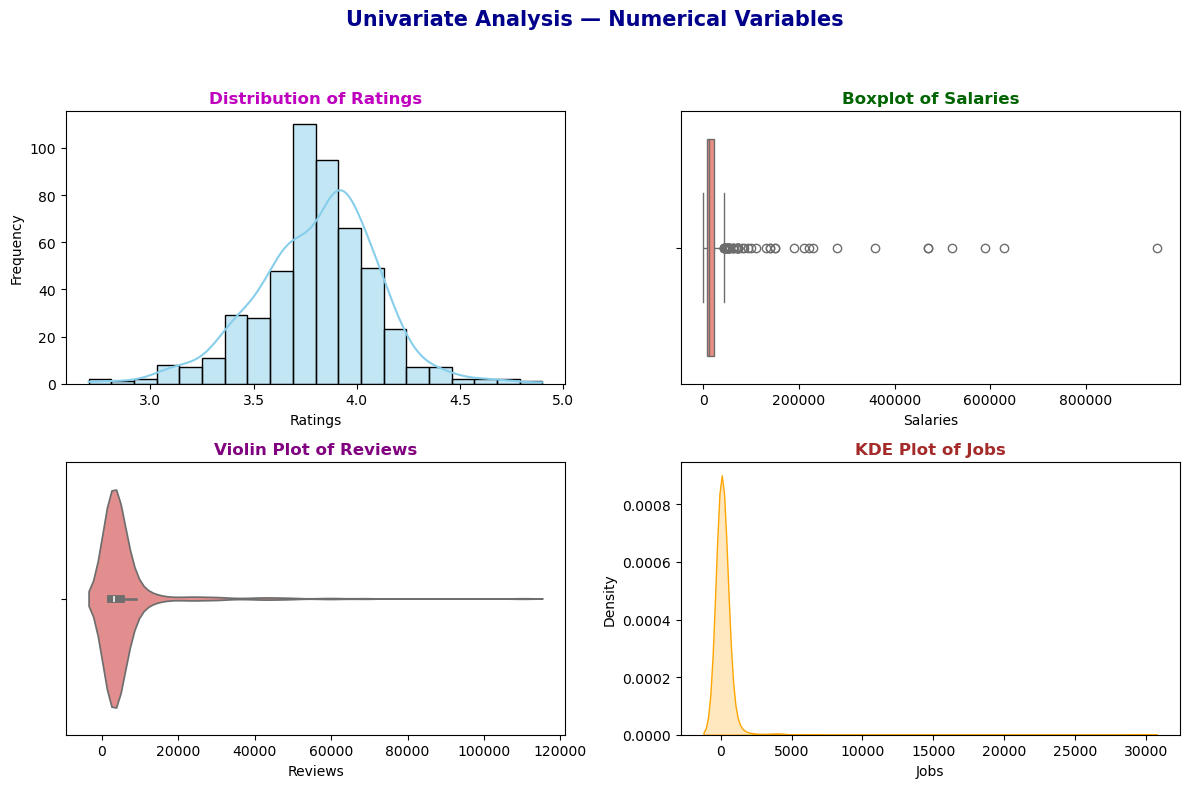

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create 2x2 grid layout ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle(
    "Univariate Analysis — Numerical Variables",
    color="darkblue",
    fontsize=15,
    fontweight="bold"
)

# 1️⃣ [0,0] — Histogram + KDE for Ratings
sns.histplot(cmpy_df['ratings'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Ratings", fontsize=12, color='m', fontweight='bold')
axes[0, 0].set_xlabel("Ratings")
axes[0, 0].set_ylabel("Frequency")

# 2️⃣ [0,1] — Boxplot for Salaries
sns.boxplot(x=cmpy_df['salaries'], color='salmon', ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Salaries", fontsize=12, color='darkgreen', fontweight='bold')
axes[0, 1].set_xlabel("Salaries")
axes[0, 1].set_ylabel("")

# 3️⃣ [1,0] — Violin Plot for Reviews
sns.violinplot(x=cmpy_df['reviews'], color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot of Reviews", fontsize=12, color='purple', fontweight='bold')
axes[1, 0].set_xlabel("Reviews")
axes[1, 0].set_ylabel("")

# 4️⃣ [1,1] — KDE Plot for Jobs
sns.kdeplot(cmpy_df['jobs'], fill=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title("KDE Plot of Jobs", fontsize=12, color='brown', fontweight='bold')
axes[1, 1].set_xlabel("Jobs")
axes[1, 1].set_ylabel("Density")

# --- Adjust layout and save ---
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig(r"D:\Dataset\Univariate_Numerical_Analysis.png", bbox_inches='tight')
plt.show();

##### categorical column

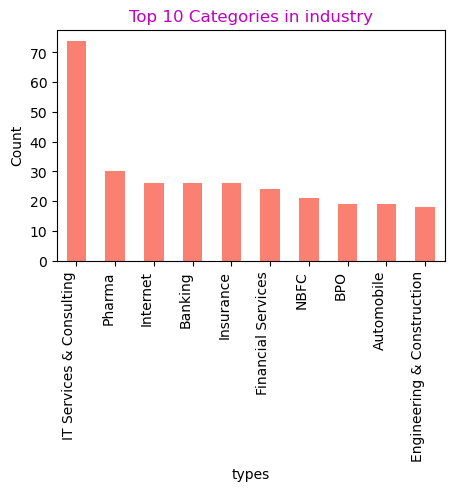

In [49]:
plt.figure(figsize=(5,3))
cmpy_df["types"].value_counts(dropna=False).head(10).plot(kind='bar', color='salmon')
plt.title(f"Top 10 Categories in industry",color='m')
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')
plt.tight_layout(rect=[0, 1, 1, 0.97])
plt.savefig(r"D:Dataset/univariate cat3.png")
plt.show(); 

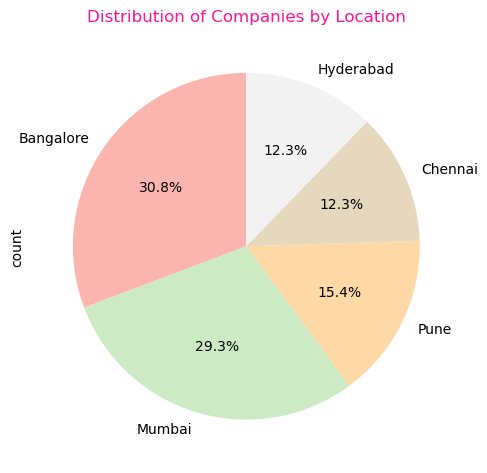

In [50]:
plt.figure(figsize=(5,5))
cmpy_df['location'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title("Distribution of Companies by Location",color='deeppink')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"D:Dataset/univariate cat2.png")
plt.show();

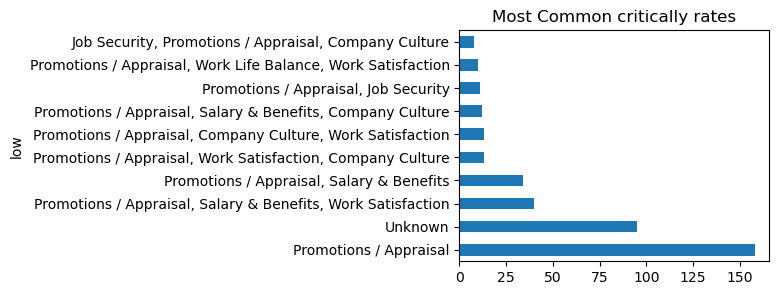

In [51]:
plt.figure(figsize=(4,3))
cmpy_df["low"].value_counts().head(10).plot(kind="barh")
plt.title("Most Common critically rates")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"D:Dataset/univariate cat1.png")
plt.show(); 

## Bivariate Analysis

##### categorical vs numerical

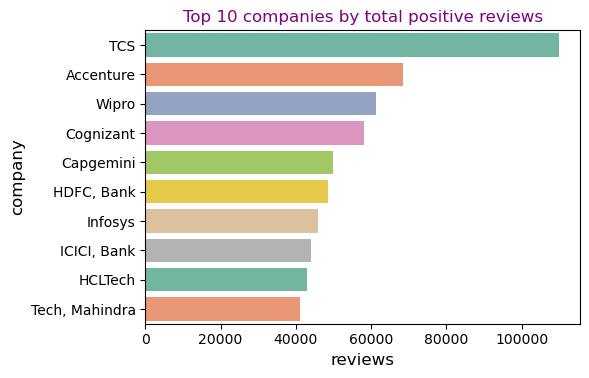

In [52]:
top_reviewed_companies = cmpy_df[['company', 'reviews']].sort_values(by='reviews', ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x='reviews', y='company', data=top_reviewed_companies, palette='Set2')
plt.title("Top 10 companies by total positive reviews",color="purple")
plt.ylabel("company", fontsize=12)
plt.xlabel("reviews", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"D:Dataset/bivariate cat vs num2.png")
plt.show();  

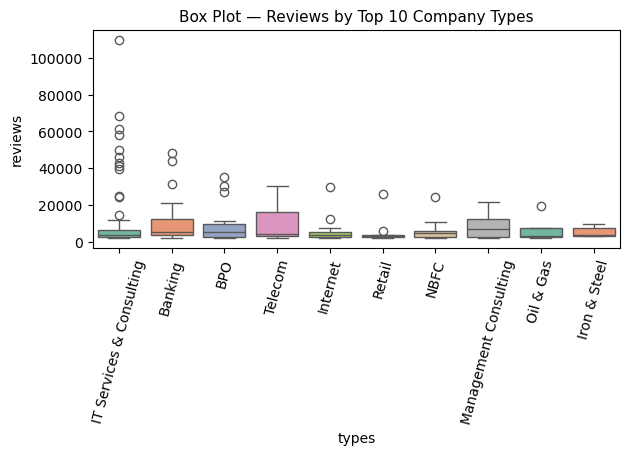

In [53]:
top10_types = cmpy_df.groupby('types')['reviews'].mean().sort_values(ascending=False).head(10).index
top10_df = cmpy_df[cmpy_df['types'].isin(top10_types)]
sns.boxplot(data=top10_df, x="types", y="reviews", palette="Set2")
plt.title("Box Plot — Reviews by Top 10 Company Types", fontsize=11)
plt.xticks(rotation=75)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"D:Dataset/bivariate cat vs num1.png")
plt.show(); 

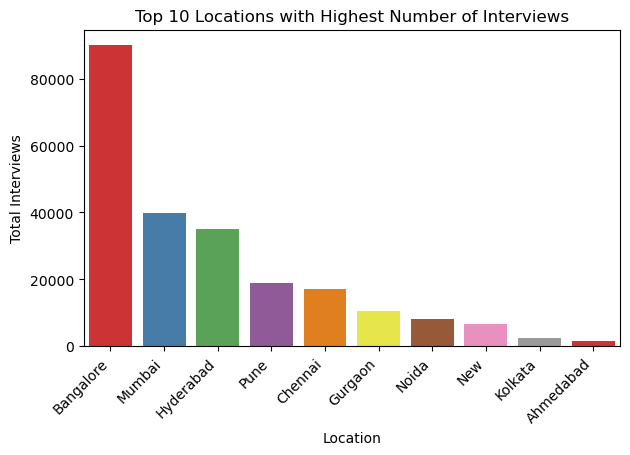

In [54]:
a = cmpy_df.groupby('location')['interviews'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(x='location', y='interviews', data=a, palette='Set1')

plt.title("Top 10 Locations with Highest Number of Interviews")
plt.xlabel("Location")
plt.ylabel("Total Interviews")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"D:Dataset/bivariate cat vs num3.png")
plt.show();

##### numerical vs numerical 

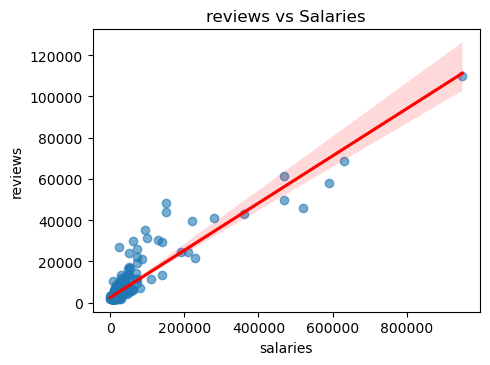

In [55]:
plt.figure(figsize=(5,4))
sns.regplot(x="salaries", y="reviews", data=cmpy_df,scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'})
plt.title("reviews vs Salaries")
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig(r"D:\Dataset\Bivariate_Num vs num1.png", bbox_inches='tight')
plt.show(); 

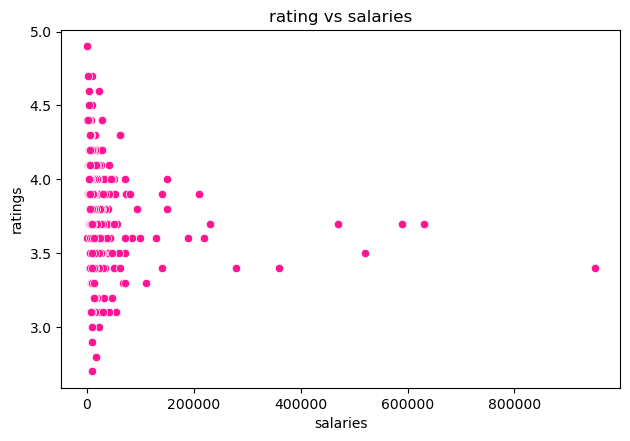

In [56]:
sns.scatterplot(
    data=cmpy_df,
    x="salaries",
    y="ratings",
    alpha=1,
    color='deeppink'
)
plt.title("rating vs salaries")
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig(r"D:\Dataset\Bivariate_Num vs num2.png", bbox_inches='tight')
plt.show(); 

#### categorical vs categorical

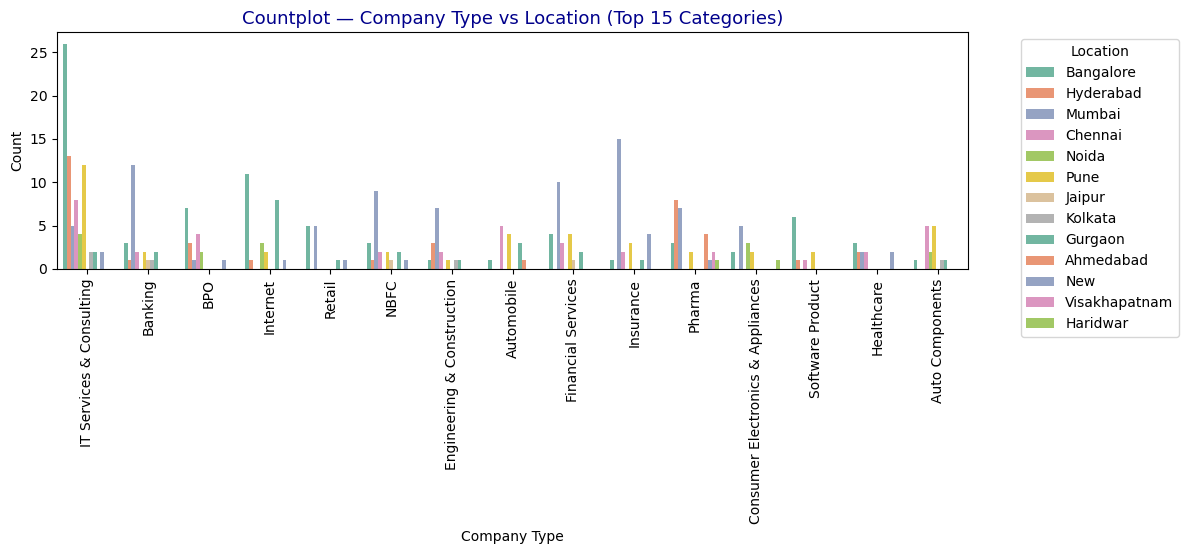

In [57]:
# Filter top 15 for clarity
top_types = cmpy_df['types'].value_counts().head(15).index
top_locs = cmpy_df['location'].value_counts().head(15).index
filtered_df = cmpy_df[(cmpy_df['types'].isin(top_types)) & (cmpy_df['location'].isin(top_locs))]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="types", hue="location", palette="Set2")
plt.title("Countplot — Company Type vs Location (Top 15 Categories)", fontsize=13, color='darkblue')
plt.xlabel("Company Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig(r"D:\Dataset\Bivariate_cat vs cat2.png", bbox_inches='tight')
plt.show();

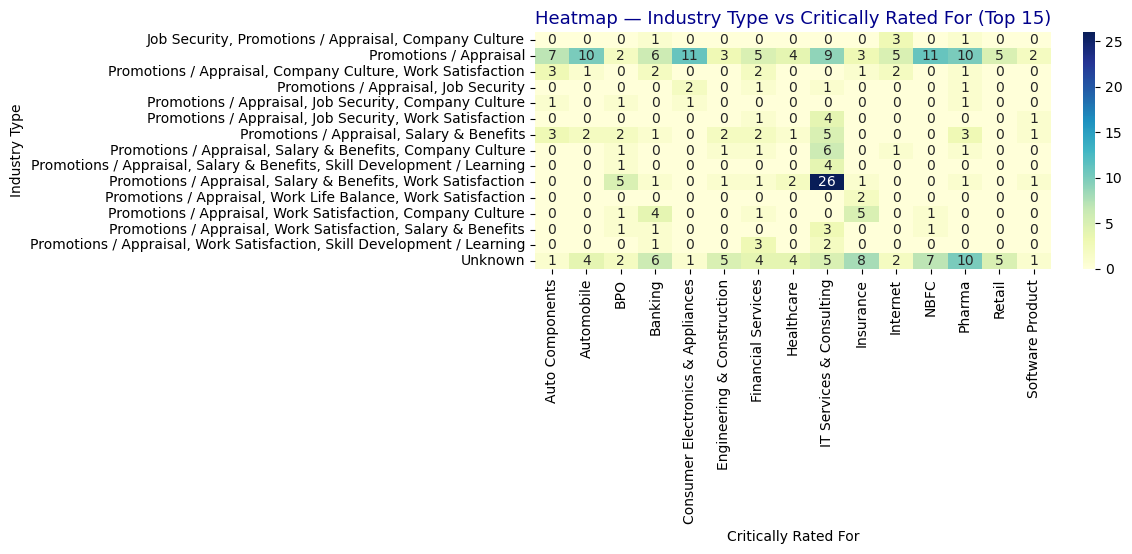

In [58]:
# Filter top 15 values
top_types = cmpy_df['types'].value_counts().head(15).index
top_low = cmpy_df['low'].value_counts().head(15).index
filtered_df = cmpy_df[(cmpy_df['types'].isin(top_types)) & (cmpy_df['low'].isin(top_low))]

# Crosstab for heatmap
cross_tab = pd.crosstab(filtered_df['low'], filtered_df['types'])

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap — Industry Type vs Critically Rated For (Top 15)", fontsize=13, color='darkblue')
plt.xlabel("Critically Rated For")
plt.ylabel("Industry Type")
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig(r"D:\Dataset\Bivariate_cat vs cat3.png", bbox_inches='tight')
plt.show();

## Multivariate Analysis

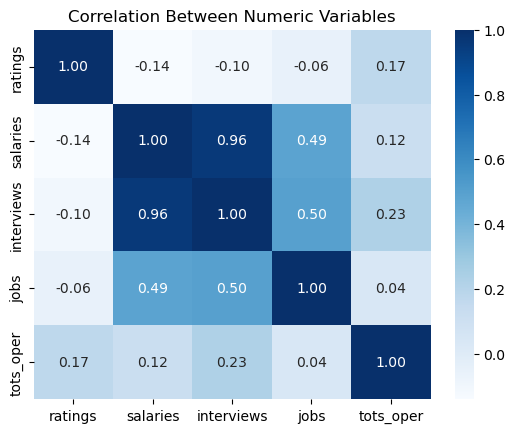

In [59]:
corr = cmpy_df[[ 'ratings','salaries', 'interviews', 'jobs', 'tots_oper']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Between Numeric Variables")
plt.savefig("correlation Between Numeric Variables.png")
plt.show();

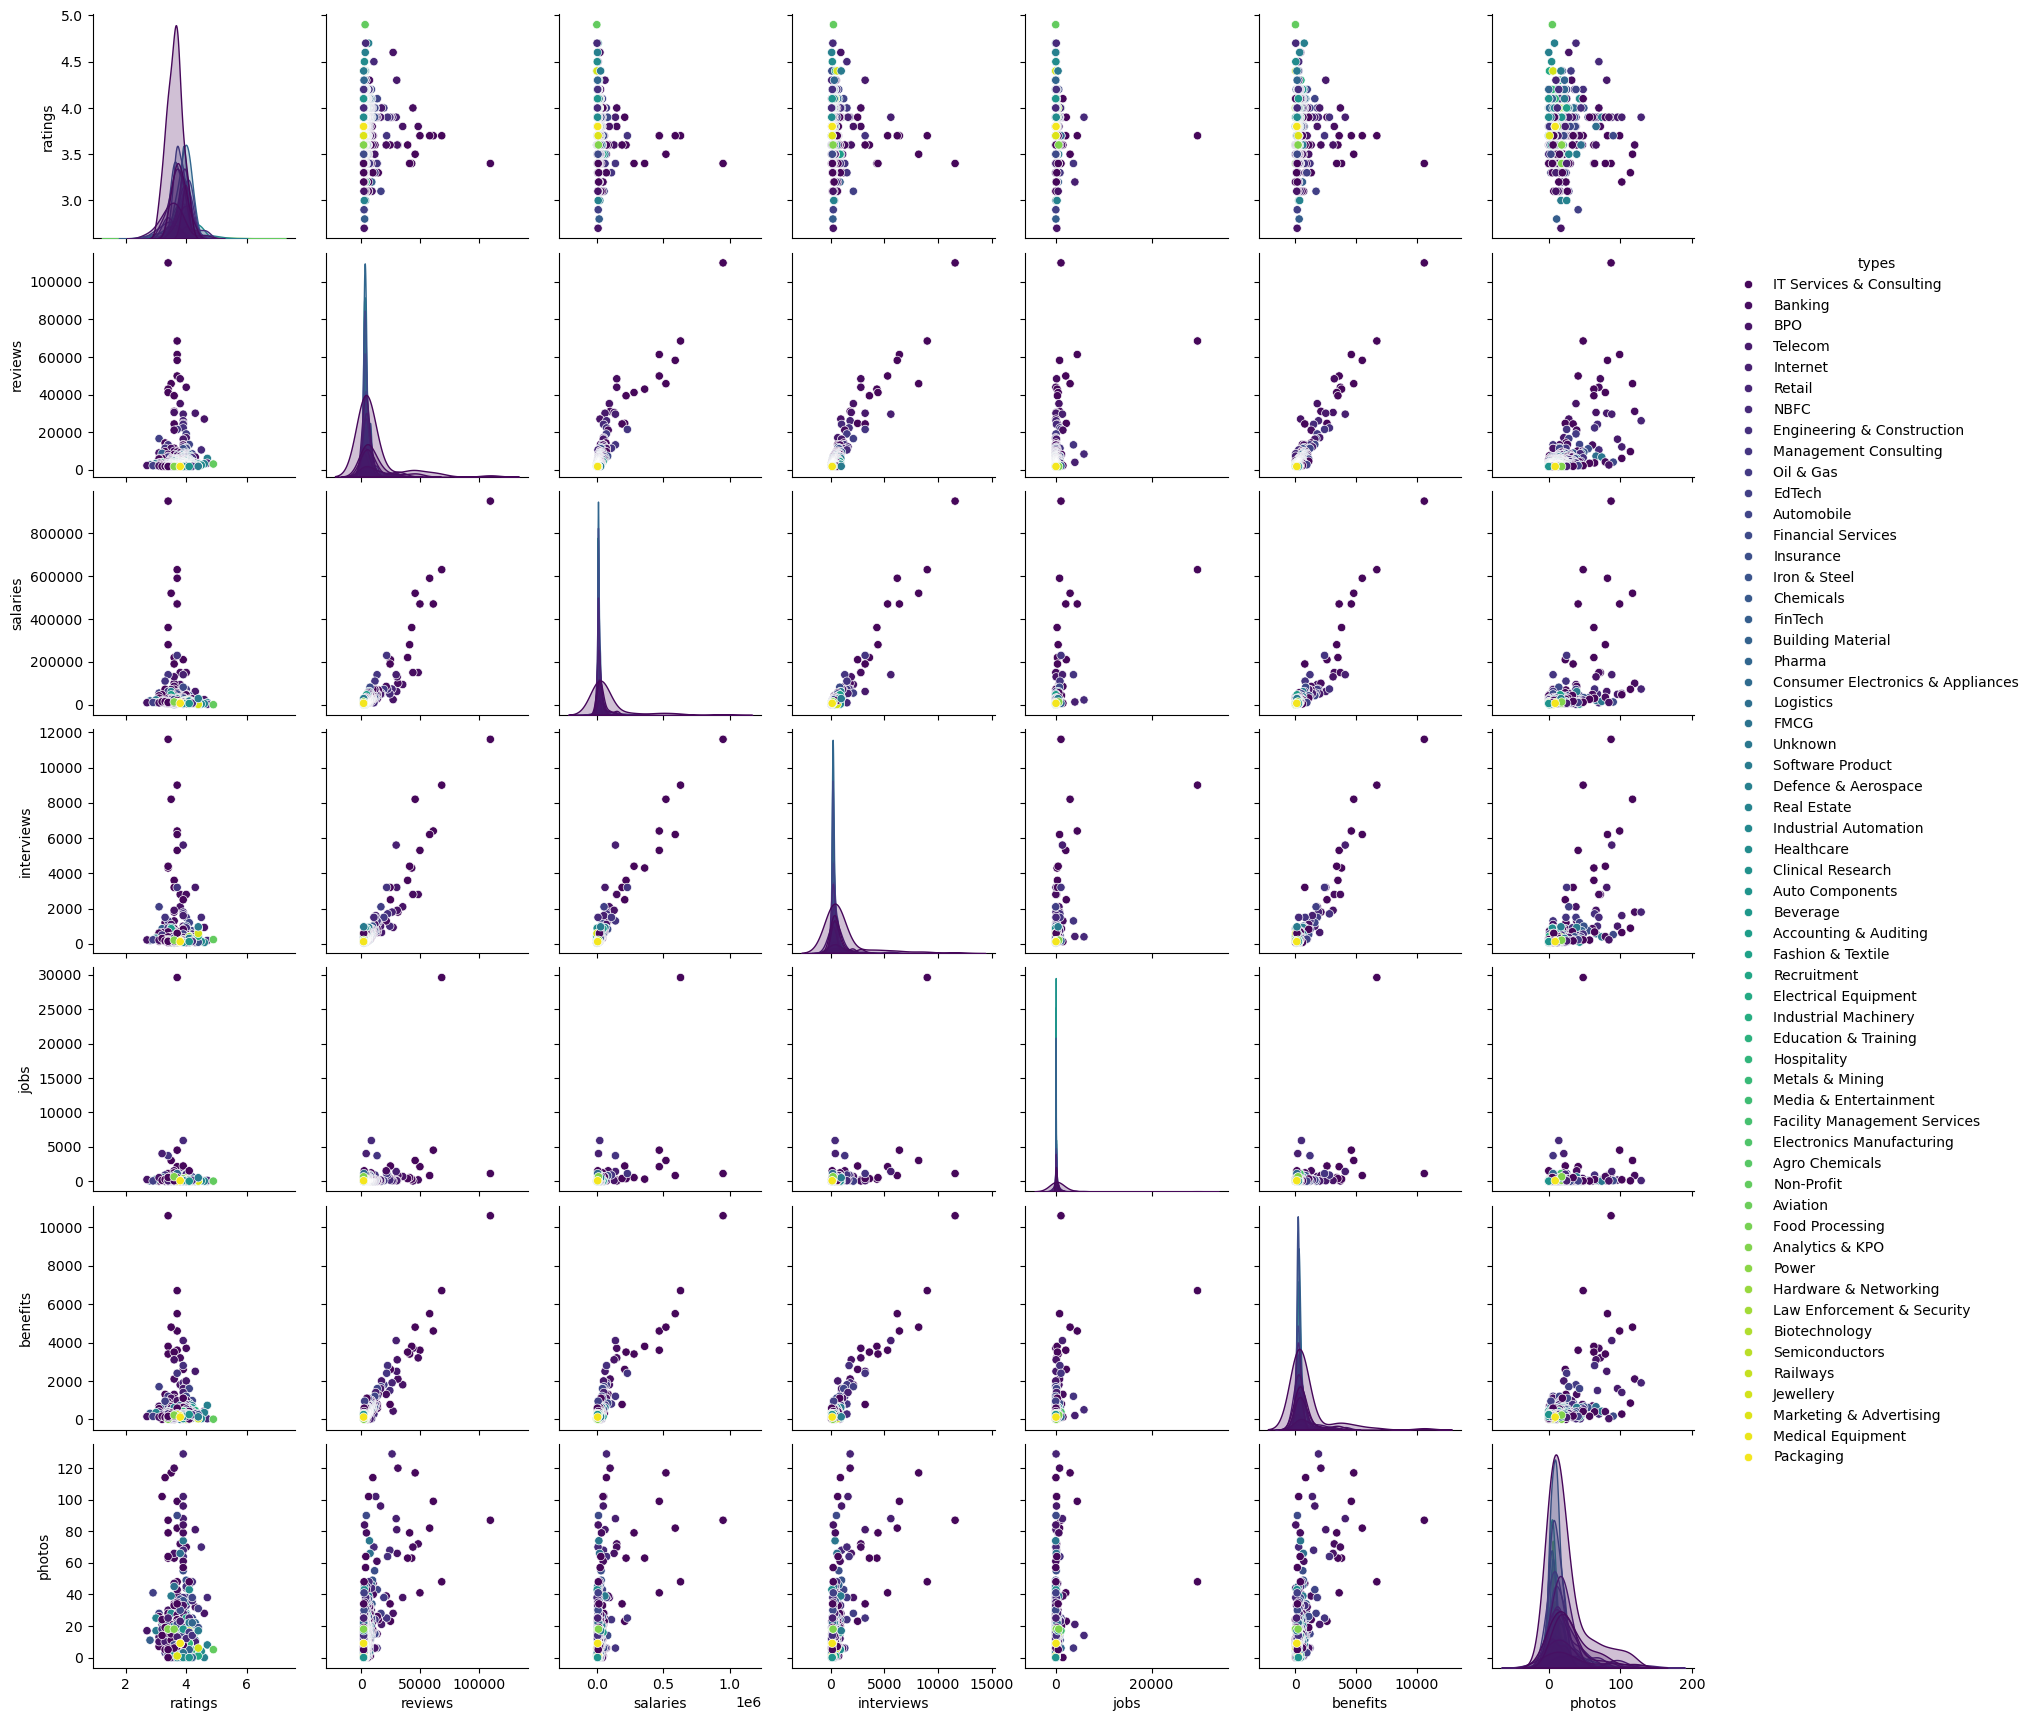

In [60]:
sns.pairplot(cmpy_df, vars=['ratings','reviews','salaries','interviews','jobs','benefits','photos'],
             hue='types', diag_kind='kde', palette='viridis')
plt.savefig(r"D:Dataset/pairplot1.png");

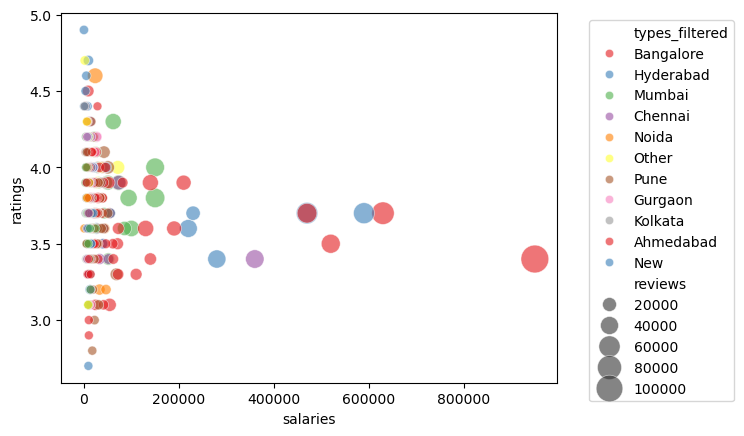

In [61]:
top_types = cmpy_df['location'].value_counts().head(10).index
cmpy_df['types_filtered'] = cmpy_df['location'].apply(lambda x: x if x in top_types else 'Other')

sns.scatterplot(data=cmpy_df, x='salaries', y='ratings', size='reviews', hue='types_filtered', alpha=0.6, sizes=(40,400),palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');